In [131]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Your extracted features (more can be added to this list)
X = np.array([
   [-3.09829681e-16,  1.07407623e-15,  5.16382802e-17,  4.13106242e-17,
        3.09829681e-16, -4.07942414e-16, -4.13106242e-17,  3.51140305e-16,
        2.68519057e-16, -1.13604216e-16, -1.85897809e-16,  1.34259529e-16,
       -2.06553121e-17,  8.23332143e+00,  1.15749625e-01,  1.22784213e+03,
        8.93199161e+02],
    [-4.54416866e-16, -1.30128466e-15, -6.19659363e-16, -5.16382802e-17,
        1.65242497e-16, -2.68519057e-16,  2.06553121e-17, -2.06553121e-17,
       -1.44587185e-16, -1.65242497e-16, -2.06553121e-17, -1.03276560e-16,
        2.47863745e-16,  8.27771669e+00,  1.19479867e-01,  1.30057221e+03,
        8.75378309e+02]
])


In [133]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity = cosine_similarity([X[0]], [X[1]])[0][0]
print("Cosine similarity:", similarity)

Cosine similarity: 0.9993342730364877


In [91]:
from scipy.spatial.distance import euclidean

euclid = euclidean(X[0], X[1])
print("Euclidean distance:", euclid)

Euclidean distance: 132.66173055683123


In [92]:
from scipy.spatial.distance import cityblock  # same as Manhattan

manhattan = cityblock(X[0], X[1])
print("Manhattan distance:", manhattan)

Manhattan distance: 161.018886647


In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.22474487, -1.22474487, -1.22474487,  1.22474487,  1.22474487,
         1.22474487,  1.22474487, -1.22474487,  1.22474487,  1.22474487,
         1.22474487,  1.22474487,  1.22474487,  1.22474487,  1.22474487,
         1.22474487,  1.22474487],
       [-0.81649658,  0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658, -0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658],
       [-0.81649658,  0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658, -0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658],
       [-0.81649658,  0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658,  0.81649658, -0.81649658, -0.81649658,
        -0.81649658, -0.81649658, -0.81649658, -0.81649658, -0.81649658,
        -0.81649658

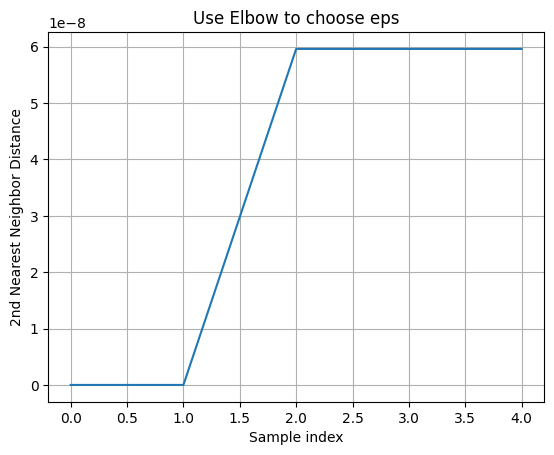

Chosen epsilon value: 5.960464477539063e-08


In [97]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

# Find optimal eps
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 1])

# Step 2: Use KneeLocator to find the optimal epsilon (elbow)
kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
epsilon = distances[kneedle.elbow]

plt.plot(distances)
plt.title("Use Elbow to choose eps")
plt.xlabel("Sample index")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.grid()
plt.show()
print(f"Chosen epsilon value: {epsilon}")

In [116]:
from sklearn.metrics.pairwise import cosine_distances
cosine_dist = cosine_distances(X)
cosine_dist

array([[0.        , 0.00053418, 0.00053418, 0.00053418, 0.        ],
       [0.00053418, 0.        , 0.        , 0.        , 0.00053418],
       [0.00053418, 0.        , 0.        , 0.        , 0.00053418],
       [0.00053418, 0.        , 0.        , 0.        , 0.00053418],
       [0.        , 0.00053418, 0.00053418, 0.00053418, 0.        ]])

In [84]:

# Run DBSCAN with precomputed cosine distances
dbscan = DBSCAN(eps=0.001, min_samples=2, metric='precomputed')
labels = dbscan.fit_predict(cosine_dist)

print("Cluster Labels:", labels)

Cluster Labels: [0 0]


In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(X)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.001, metric='precomputed', linkage='average')
labels = model.fit_predict(distance_matrix)
labels

array([1, 0])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X)
print(sim)

# Apply a threshold to determine same/different environment
threshold = 0.995
is_similar = sim > threshold
is_similar

[[1.        0.9993051]
 [0.9993051 1.       ]]


array([[ True,  True],
       [ True,  True]])